# Tweet Analysis for Cryptocurrency



#### Importing the Required Libraries and Loading the Data from Json file

In [13]:
# Importing the important libraries 

import tweepy
from tweepy import OAuthHandler
import json
import re
from nltk.tokenize import word_tokenize
import operator
from collections import Counter
from nltk import bigrams
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tweets_data_path = "C:\\Users\\dashs\\Desktop\\tweets0409\\tweets0409.json"

In [19]:
tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue


print (len(tweets_data))

df = pd.DataFrame(tweets_data)

30716


In [20]:
df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,reply_count,retweet_count,retweeted,retweeted_status,source,text,timestamp_ms,truncated,user,withheld_in_countries
0,None,None,Tue Apr 10 02:12:38 +0000 2018,NaN,"{'hashtags': [{'text': 'cryptopussy', 'indices...",NaN,{'full_text': 'Fill my #cryptopussy with #VERG...,0,False,low,...,0,0,False,NaN,"<a href=""https://reouiter.com"" rel=""nofollow"">...",Fill my #cryptopussy with #VERGE DLxiyMix3M2bm...,1523326358217,True,"{'id': 963135285461766144, 'id_str': '96313528...",NaN
1,None,None,Tue Apr 10 02:12:38 +0000 2018,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,0,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Check out my classroom on @DonorsChoose! I'd l...,1523326358633,False,"{'id': 899773235033759744, 'id_str': '89977323...",NaN
2,None,None,Tue Apr 10 02:12:39 +0000 2018,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,0,0,False,{'created_at': 'Mon Apr 09 12:30:00 +0000 2018...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @skillchain_io: 在英国买假学历虽不算非法行为，也只有20%的雇主对申请...,1523326359374,False,"{'id': 908291729887023104, 'id_str': '90829172...",NaN
3,None,None,Tue Apr 10 02:12:39 +0000 2018,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,0,0,False,{'created_at': 'Tue Apr 10 02:08:11 +0000 2018...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @kokom101: coindera: Top 5\n\r $LNC $BTC on...,1523326359434,False,"{'id': 737001661, 'id_str': '737001661', 'name...",NaN
4,None,None,Tue Apr 10 02:12:39 +0000 2018,NaN,"{'hashtags': [{'text': 'cryptocurrency', 'indi...",NaN,NaN,0,False,low,...,0,0,False,{'created_at': 'Fri Apr 06 17:14:02 +0000 2018...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @xtradeio: There's only one survivor of thi...,1523326359445,False,"{'id': 908581024682016769, 'id_str': '90858102...",NaN


In [17]:
# Importing TextBlob for natural language processing and sentiment analysis

from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [21]:
# Getting polarith and subjectivity as well as assigning an Sentiment to each of the tweet. 

df[['polarity', 'subjectivity']] = df['text'].apply(lambda text: pd.Series(TextBlob(text).sentiment))
df['SA'] = np.array([ analize_sentiment(tweet) for tweet in df['text'] ])

In [22]:
# Checking the numbers of polarity, subjectivity and Sentiments of the first 5 tweet.

df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,retweeted_status,source,text,timestamp_ms,truncated,user,withheld_in_countries,polarity,subjectivity,SA
0,None,None,Tue Apr 10 02:12:38 +0000 2018,NaN,"{'hashtags': [{'text': 'cryptopussy', 'indices...",NaN,{'full_text': 'Fill my #cryptopussy with #VERG...,0,False,low,...,NaN,"<a href=""https://reouiter.com"" rel=""nofollow"">...",Fill my #cryptopussy with #VERGE DLxiyMix3M2bm...,1523326358217,True,"{'id': 963135285461766144, 'id_str': '96313528...",NaN,0.000,0.0,0
1,None,None,Tue Apr 10 02:12:38 +0000 2018,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Check out my classroom on @DonorsChoose! I'd l...,1523326358633,False,"{'id': 899773235033759744, 'id_str': '89977323...",NaN,0.625,0.6,1
2,None,None,Tue Apr 10 02:12:39 +0000 2018,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,{'created_at': 'Mon Apr 09 12:30:00 +0000 2018...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @skillchain_io: 在英国买假学历虽不算非法行为，也只有20%的雇主对申请...,1523326359374,False,"{'id': 908291729887023104, 'id_str': '90829172...",NaN,0.000,0.0,0
3,None,None,Tue Apr 10 02:12:39 +0000 2018,NaN,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,NaN,0,False,low,...,{'created_at': 'Tue Apr 10 02:08:11 +0000 2018...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @kokom101: coindera: Top 5\n\r $LNC $BTC on...,1523326359434,False,"{'id': 737001661, 'id_str': '737001661', 'name...",NaN,0.500,0.5,1
4,None,None,Tue Apr 10 02:12:39 +0000 2018,NaN,"{'hashtags': [{'text': 'cryptocurrency', 'indi...",NaN,NaN,0,False,low,...,{'created_at': 'Fri Apr 06 17:14:02 +0000 2018...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @xtradeio: There's only one survivor of thi...,1523326359445,False,"{'id': 908581024682016769, 'id_str': '90858102...",NaN,0.000,1.0,0


In [26]:
df = df[['created_at', 'polarity']]

In [27]:
df.head()

,created_at,polarity
0,Tue Apr 10 02:12:38 +0000 2018,0.000
1,Tue Apr 10 02:12:38 +0000 2018,0.625
2,Tue Apr 10 02:12:39 +0000 2018,0.000
3,Tue Apr 10 02:12:39 +0000 2018,0.500
4,Tue Apr 10 02:12:39 +0000 2018,0.000


In [29]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [30]:
df.head()

,created_at,polarity
0,2018-04-10 02:12:38,0.000
1,2018-04-10 02:12:38,0.625
2,2018-04-10 02:12:39,0.000
3,2018-04-10 02:12:39,0.500
4,2018-04-10 02:12:39,0.000


In [58]:
df_btc = pd.read_csv('C:\\Users\\dashs\\Downloads\\cryptocurrency_social-master\\bitcoinprice.csv')

In [59]:
df_btc['created_at'] = pd.to_datetime(df_btc['Date'])

In [60]:
df_btc.head()

,Date,Close Price,created_at
0,4/10/18 0:00,6773.94,2018-04-10 00:00:00
1,4/10/18 0:01,6775.18,2018-04-10 00:01:00
2,4/10/18 0:02,6778.08,2018-04-10 00:02:00
3,4/10/18 0:03,6777.65,2018-04-10 00:03:00
4,4/10/18 0:04,6778.68,2018-04-10 00:04:00


In [62]:
df_combined = pd.merge(df, df_btc, on='created_at', how='inner')

In [63]:
df_combined.head()

,created_at,polarity,Date,Close Price
0,2018-04-10 02:13:00,0.0000,4/10/18 2:13,6742.44
1,2018-04-10 02:13:00,0.0000,4/10/18 2:13,6742.44
2,2018-04-10 02:13:00,0.9375,4/10/18 2:13,6742.44
3,2018-04-10 02:13:00,0.0000,4/10/18 2:13,6742.44
4,2018-04-10 02:14:00,0.0000,4/10/18 2:14,6744.23


In [64]:
print (len(df_combined))

626


In [74]:
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.ioff()

np.random.seed(3057) 

In [85]:
pscore = df_combined['polarity']
pscore = pscore.values
pscore[:5]

array([ 0.    ,  0.    ,  0.9375,  0.    ,  0.    ])

In [86]:
len(pscore)

626

In [81]:
btc_price = df_combined['Close Price']
btc_price = btc_price.values
btc_price[:5]

array([ 6742.44,  6742.44,  6742.44,  6742.44,  6744.23])

In [84]:
len(btc_price)

626

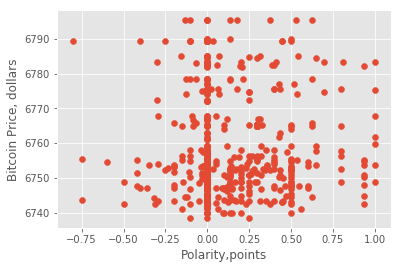

In [87]:
fig, ax = plt.subplots()
ax.set_xlabel("Polarity,points")
ax.set_ylabel("Bitcoin Price, dollars")
ax.scatter(pscore, btc_price)
fig

In [89]:
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

In [91]:
pscore = pscore.reshape(-1, 1)
btc_price = btc_price.reshape(-1, 1)
print(pscore[:5])
print(btc_price[:5])

[[ 0.    ]
 [ 0.    ]
 [ 0.9375]
 [ 0.    ]
 [ 0.    ]]
[[ 6742.44]
 [ 6742.44]
 [ 6742.44]
 [ 6742.44]
 [ 6744.23]]


In [92]:
lr.fit(pscore, btc_price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
print(lr.intercept_)

[ 6758.40380634]


In [94]:
print(lr.coef_)

[[ 1.57863986]]


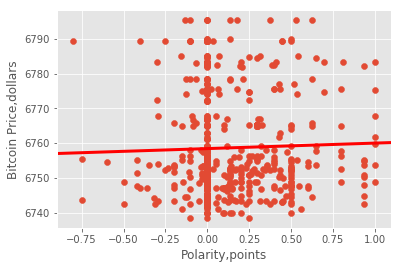

In [95]:
fig.clf()
ax = fig.add_subplot(111)
ax.set_xlabel("Polarity,points")
ax.set_ylabel("Bitcoin Price,dollars")
ax.scatter(pscore, btc_price)
xmin, xmax = ax.get_xlim()
ax.plot([xmin, xmax], [lr.predict(xmin)[0][0], lr.predict(xmax)[0][0]], linewidth=3, color="red")
ax.set_xlim([xmin, xmax])
fig

In [96]:
estimated_price = lr.predict(0.8)
print(estimated_price)

[[ 6759.66671823]]
